<center>

# **22AIE401 - Reinforcement Learning**  
# **Lab 8**  

</center>

### Team Members:
- Guruprasath M R - AIE22015  
- Rudraksh Mohanty - AIE22046  
- Shree Prasad M - AIE22050  
- Tharun Kaarthik G K - AIE22062  

---

### Objective:
To implement and analyze the Prioritized Sweeping algorithm in a dynamic, grid-based environment where a rescue robot must learn the optimal path to reach survivors while avoiding traps and obstacles. 


---

### Problem Statement:
A rescue robot is deployed in a 6×6 disaster-hit zone represented as a grid. The environment contains: Safe paths, Obstacles (impassable), Traps (danger zones), Goal locations where survivors are located. The robot begins at the top-left corner (0,0) and must learn the best route to reach the survivors at (5,5) using Prioritized Sweeping. Every move incurs a small cost, traps cause severe penalties, and reaching a survivor gives a positive reward. 
 


---

## Original Code

Learned Policy (Lab 8 - Prioritized Sweeping):
→ → → → ↓ ↓
↑ ↑ ↑ X → ↓
↑ ↑ █ → → ↓
↓ █ → ↑ X ↓
→ → → ↑ █ ↓
→ ↑ ↑ ↑ → G


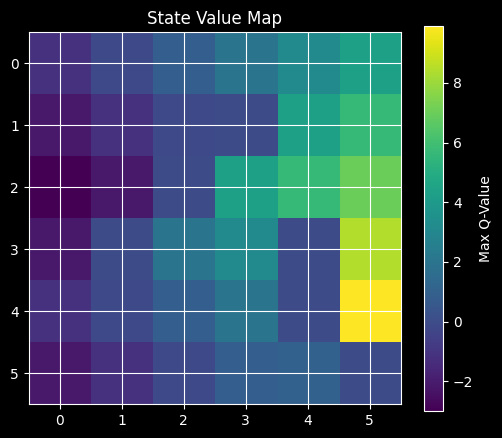

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

# Environment setup
GRID_SIZE = 6
GOAL = (5, 5)
OBSTACLES = {(2, 2), (3, 1), (4, 4)}
TRAPS = {(1, 3), (3, 4)}
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_MAP = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
REWARD_GOAL = 10
REWARD_TRAP = -10
REWARD_STEP = -1
EPISODES = 100
MAX_STEPS = 50
ALPHA = 0.1
GAMMA = 0.95
EPSILON = 0.1
THETA = 0.01

Q = defaultdict(lambda: {a: 0 for a in ACTIONS})
model = {}
priority_queue = []

def is_valid(pos):
    return 0 <= pos[0] < GRID_SIZE and 0 <= pos[1] < GRID_SIZE and pos not in OBSTACLES

def step(state, action):
    dx, dy = ACTION_MAP[action]
    next_state = (state[0] + dx, state[1] + dy)
    if not is_valid(next_state):
        next_state = state
    if next_state == GOAL:
        return next_state, REWARD_GOAL
    if next_state in TRAPS:
        return next_state, REWARD_TRAP
    return next_state, REWARD_STEP

def select_action(state):
    if np.random.rand() < EPSILON:
        return np.random.choice(ACTIONS)
    return max(Q[state], key=Q[state].get)

def update_priority(state, action, reward, next_state):
    target = reward + GAMMA * max(Q[next_state].values())
    diff = abs(Q[state][action] - target)
    if diff > THETA:
        heapq.heappush(priority_queue, (-diff, state, action))

def update_q():
    for _ in range(50):
        if not priority_queue:
            break
        _, s, a = heapq.heappop(priority_queue)
        s_, r = model[(s, a)]
        target = r + GAMMA * max(Q[s_].values())
        Q[s][a] += ALPHA * (target - Q[s][a])
        for a2 in ACTIONS:
            dx, dy = ACTION_MAP[a2]
            prev = (s[0] - dx, s[1] - dy)
            if is_valid(prev) and (prev, a2) in model:
                s_prev_, r_prev = model[(prev, a2)]
                update_priority(prev, a2, r_prev, s_prev_)

# Training loop
for ep in range(EPISODES):
    state = (0, 0)
    for _ in range(MAX_STEPS):
        action = select_action(state)
        next_state, reward = step(state, action)
        model[(state, action)] = (next_state, reward)
        update_priority(state, action, reward, next_state)
        update_q()
        if next_state == GOAL:
            break
        state = next_state

# Visualization with arrows
arrow_map = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→'}
policy_grid = np.full((GRID_SIZE, GRID_SIZE), ' ')
value_grid = np.zeros((GRID_SIZE, GRID_SIZE))
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        cell = (i, j)
        if cell == GOAL:
            policy_grid[i, j] = 'G'
        elif cell in OBSTACLES:
            policy_grid[i, j] = '█'
        elif cell in TRAPS:
            policy_grid[i, j] = 'X'
        else:
            best_a = max(Q[cell], key=Q[cell].get)
            policy_grid[i, j] = arrow_map[best_a]
            value_grid[i, j] = max(Q[cell].values())

# Display
print("Learned Policy (Lab 8 - Prioritized Sweeping):")
for row in policy_grid:
    print(' '.join(row))

# Optional: Plot value grid
plt.style.use('dark_background')
plt.figure(figsize=(6, 5))
plt.imshow(value_grid, cmap='viridis')
plt.colorbar(label="Max Q-Value")
plt.title("State Value Map")
plt.xticks(np.arange(GRID_SIZE))
plt.yticks(np.arange(GRID_SIZE))
plt.grid(True)
plt.show()

### TASK-1
Update the environment so that survivors randomly change locations every few episodes. The robot must relearn paths efficiently using prioritized sweeping instead of starting from scratch.

Episode 10: Goal changed to (5, 3)
Episode 20: Goal changed to (3, 3)
Episode 30: Goal changed to (1, 2)
Episode 40: Goal changed to (0, 1)
Episode 50: Goal changed to (0, 4)
Episode 60: Goal changed to (1, 1)
Episode 70: Goal changed to (2, 4)
Episode 80: Goal changed to (0, 2)
Episode 90: Goal changed to (4, 1)
Episode 40: Goal changed to (0, 1)
Episode 50: Goal changed to (0, 4)
Episode 60: Goal changed to (1, 1)
Episode 70: Goal changed to (2, 4)
Episode 80: Goal changed to (0, 2)
Episode 90: Goal changed to (4, 1)
Final Goal: (4, 1)
Learned Policy (Lab 8 - Task 1: Dynamic Goals):
↓ ↓ ↓ ← → ←
↓ ↓ ← X ↓ ↑
↓ ← █ ↓ ← ←
↓ █ ↓ ↓ X ↑
→ G ← ← █ ↑
↑ ↑ ← ← ↑ ↑
Final Goal: (4, 1)
Learned Policy (Lab 8 - Task 1: Dynamic Goals):
↓ ↓ ↓ ← → ←
↓ ↓ ← X ↓ ↑
↓ ← █ ↓ ← ←
↓ █ ↓ ↓ X ↑
→ G ← ← █ ↑
↑ ↑ ← ← ↑ ↑


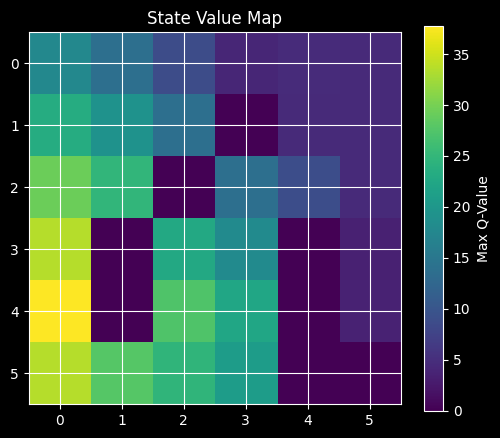

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict
import random

# Environment setup
GRID_SIZE = 6
GOAL = (5, 5)
OBSTACLES = {(2, 2), (3, 1), (4, 4)}
TRAPS = {(1, 3), (3, 4)}
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_MAP = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
REWARD_GOAL = 10
REWARD_TRAP = -10
REWARD_STEP = -1
EPISODES = 100
MAX_STEPS = 50
ALPHA = 0.1
GAMMA = 0.95
EPSILON = 0.1
THETA = 0.01
GOAL_CHANGE_EPISODES = 10  # Change goal every 10 episodes

Q = defaultdict(lambda: {a: 0 for a in ACTIONS})
model = {}
priority_queue = []

def is_valid(pos):
    return 0 <= pos[0] < GRID_SIZE and 0 <= pos[1] < GRID_SIZE and pos not in OBSTACLES

def step(state, action):
    dx, dy = ACTION_MAP[action]
    next_state = (state[0] + dx, state[1] + dy)
    if not is_valid(next_state):
        next_state = state
    if next_state == GOAL:
        return next_state, REWARD_GOAL
    if next_state in TRAPS:
        return next_state, REWARD_TRAP
    return next_state, REWARD_STEP

def select_action(state):
    if np.random.rand() < EPSILON:
        return np.random.choice(ACTIONS)
    return max(Q[state], key=Q[state].get)

def update_priority(state, action, reward, next_state):
    target = reward + GAMMA * max(Q[next_state].values())
    diff = abs(Q[state][action] - target)
    if diff > THETA:
        heapq.heappush(priority_queue, (-diff, state, action))

def update_q():
    for _ in range(50):
        if not priority_queue:
            break
        _, s, a = heapq.heappop(priority_queue)
        s_, r = model[(s, a)]
        target = r + GAMMA * max(Q[s_].values())
        Q[s][a] += ALPHA * (target - Q[s][a])
        for a2 in ACTIONS:
            dx, dy = ACTION_MAP[a2]
            prev = (s[0] - dx, s[1] - dy)
            if is_valid(prev) and (prev, a2) in model:
                s_prev_, r_prev = model[(prev, a2)]
                update_priority(prev, a2, r_prev, s_prev_)

# Training loop
for ep in range(EPISODES):
    if ep % GOAL_CHANGE_EPISODES == 0 and ep > 0:
        # Change goal to a random valid position
        possible_goals = [(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE) 
                          if (i, j) not in OBSTACLES and (i, j) not in TRAPS and (i, j) != (0, 0)]
        GOAL = random.choice(possible_goals)
        print(f"Episode {ep}: Goal changed to {GOAL}")
    
    state = (0, 0)
    for _ in range(MAX_STEPS):
        action = select_action(state)
        next_state, reward = step(state, action)
        model[(state, action)] = (next_state, reward)
        update_priority(state, action, reward, next_state)
        update_q()
        if next_state == GOAL:
            break
        state = next_state

# Visualization with arrows
arrow_map = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→'}
policy_grid = np.full((GRID_SIZE, GRID_SIZE), ' ')
value_grid = np.zeros((GRID_SIZE, GRID_SIZE))
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        cell = (i, j)
        if cell == GOAL:
            policy_grid[i, j] = 'G'
        elif cell in OBSTACLES:
            policy_grid[i, j] = '█'
        elif cell in TRAPS:
            policy_grid[i, j] = 'X'
        else:
            best_a = max(Q[cell], key=Q[cell].get)
            policy_grid[i, j] = arrow_map[best_a]
            value_grid[i, j] = max(Q[cell].values())

# Display
print(f"Final Goal: {GOAL}")
print("Learned Policy (Lab 8 - Task 1: Dynamic Goals):")
for row in policy_grid:
    print(' '.join(row))

# Optional: Plot value grid
plt.style.use('dark_background')
plt.figure(figsize=(6, 5))
plt.imshow(value_grid, cmap='viridis')
plt.colorbar(label="Max Q-Value")
plt.title("State Value Map")
plt.xticks(np.arange(GRID_SIZE))
plt.yticks(np.arange(GRID_SIZE))
plt.grid(True)
plt.show()

### Key Changes for TASK-1: Dynamic Goal Locations
- **Added random module**: Imported `random` to select new goal positions randomly.
- **GOAL_CHANGE_EPISODES**: New constant set to 10, controlling how often the goal changes.
- **Dynamic Goal Update**: In the training loop, every 10 episodes (after the first), the goal is changed to a random valid position (not obstacle, trap, or start).
- **Printing Goal Changes**: Added print statement to notify when the goal changes, for tracking.
- **Final Goal Display**: In visualization, print the final goal position since it may have changed.
- **No Reset of Q or Model**: Relies on prioritized sweeping to efficiently relearn paths without resetting knowledge, demonstrating the algorithm's strength in dynamic environments.
- **Visualization**: Updated to reflect the final goal position in the policy grid.

### TASK-2
Design certain cells to turn into traps mid-episode to simulate collapsing floors. Add a probabilistic element to cell stability, forcing the robot to quickly re-prioritize states with high error. 

Episode 0, Step 6: Cell (0, 1) became a trap!
Episode 0, Step 11: Cell (0, 2) became a trap!
Episode 0, Step 18: Cell (1, 0) became a trap!
Episode 0, Step 28: Cell (0, 3) became a trap!
Episode 1, Step 2: Cell (0, 0) became a trap!
Episode 1, Step 5: Cell (1, 0) became a trap!
Episode 1, Step 23: Cell (2, 0) became a trap!
Episode 1, Step 42: Cell (3, 0) became a trap!
Episode 2, Step 6: Cell (0, 0) became a trap!
Episode 2, Step 30: Cell (2, 1) became a trap!
Episode 3, Step 3: Cell (0, 0) became a trap!
Episode 3, Step 4: Cell (0, 1) became a trap!
Episode 3, Step 15: Cell (1, 2) became a trap!
Episode 3, Step 18: Cell (0, 2) became a trap!
Episode 3, Step 48: Cell (0, 4) became a trap!
Episode 3, Step 49: Cell (0, 3) became a trap!
Episode 4, Step 12: Cell (2, 0) became a trap!
Episode 4, Step 36: Cell (4, 1) became a trap!
Episode 4, Step 47: Cell (5, 1) became a trap!
Episode 5, Step 0: Cell (0, 0) became a trap!
Episode 5, Step 1: Cell (1, 0) became a trap!
Episode 5, Step 28: C

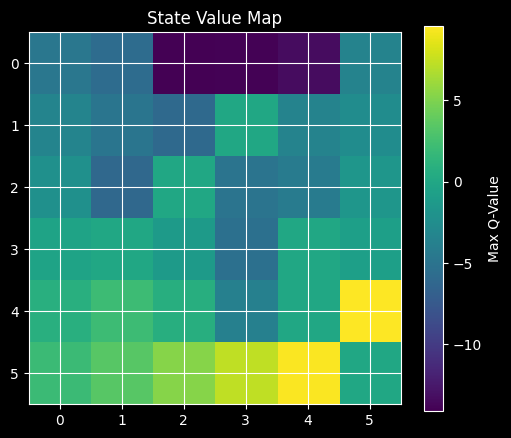

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict
import random

# Environment setup
GRID_SIZE = 6
GOAL = (5, 5)
OBSTACLES = {(2, 2), (3, 1), (4, 4)}
INITIAL_TRAPS = {(1, 3), (3, 4)}
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_MAP = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
REWARD_GOAL = 10
REWARD_TRAP = -10
REWARD_STEP = -1
EPISODES = 100
MAX_STEPS = 50
ALPHA = 0.1
GAMMA = 0.95
EPSILON = 0.1
THETA = 0.01
TRAP_PROB = 0.05  # Probability that a safe cell becomes a trap mid-episode

Q = defaultdict(lambda: {a: 0 for a in ACTIONS})
model = {}
priority_queue = []

def is_valid(pos):
    return 0 <= pos[0] < GRID_SIZE and 0 <= pos[1] < GRID_SIZE and pos not in OBSTACLES

def step(state, action, traps):
    dx, dy = ACTION_MAP[action]
    next_state = (state[0] + dx, state[1] + dy)
    if not is_valid(next_state):
        next_state = state
    if next_state == GOAL:
        return next_state, REWARD_GOAL
    if next_state in traps:
        return next_state, REWARD_TRAP
    return next_state, REWARD_STEP

def select_action(state):
    if np.random.rand() < EPSILON:
        return np.random.choice(ACTIONS)
    return max(Q[state], key=Q[state].get)

def update_priority(state, action, reward, next_state):
    target = reward + GAMMA * max(Q[next_state].values())
    diff = abs(Q[state][action] - target)
    if diff > THETA:
        heapq.heappush(priority_queue, (-diff, state, action))

def update_q():
    for _ in range(50):
        if not priority_queue:
            break
        _, s, a = heapq.heappop(priority_queue)
        s_, r = model[(s, a)]
        target = r + GAMMA * max(Q[s_].values())
        Q[s][a] += ALPHA * (target - Q[s][a])
        for a2 in ACTIONS:
            dx, dy = ACTION_MAP[a2]
            prev = (s[0] - dx, s[1] - dy)
            if is_valid(prev) and (prev, a2) in model:
                s_prev_, r_prev = model[(prev, a2)]
                update_priority(prev, a2, r_prev, s_prev_)

# Training loop
for ep in range(EPISODES):
    traps = set(INITIAL_TRAPS)  # Reset traps each episode
    state = (0, 0)
    for step_count in range(MAX_STEPS):
        action = select_action(state)
        next_state, reward = step(state, action, traps)
        
        # Check if next_state becomes a trap probabilistically
        if next_state not in traps and next_state != GOAL and next_state not in OBSTACLES and np.random.rand() < TRAP_PROB:
            traps.add(next_state)
            reward = REWARD_TRAP  # Penalize immediately
            print(f"Episode {ep}, Step {step_count}: Cell {next_state} became a trap!")
            # Update model and priority for this new trap
            model[(state, action)] = (next_state, reward)
            update_priority(state, action, reward, next_state)
        
        model[(state, action)] = (next_state, reward)
        update_priority(state, action, reward, next_state)
        update_q()
        if next_state == GOAL:
            break
        state = next_state

# Visualization with arrows
arrow_map = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→'}
policy_grid = np.full((GRID_SIZE, GRID_SIZE), ' ')
value_grid = np.zeros((GRID_SIZE, GRID_SIZE))
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        cell = (i, j)
        if cell == GOAL:
            policy_grid[i, j] = 'G'
        elif cell in OBSTACLES:
            policy_grid[i, j] = '█'
        elif cell in traps:  # Use final traps
            policy_grid[i, j] = 'X'
        else:
            best_a = max(Q[cell], key=Q[cell].get)
            policy_grid[i, j] = arrow_map[best_a]
            value_grid[i, j] = max(Q[cell].values())

# Display
print("Learned Policy (Lab 8 - Task 2: Probabilistic Traps):")
for row in policy_grid:
    print(' '.join(row))

# Optional: Plot value grid
plt.style.use('dark_background')
plt.figure(figsize=(6, 5))
plt.imshow(value_grid, cmap='viridis')
plt.colorbar(label="Max Q-Value")
plt.title("State Value Map")
plt.xticks(np.arange(GRID_SIZE))
plt.yticks(np.arange(GRID_SIZE))
plt.grid(True)
plt.show()

### Key Changes for TASK-2: Probabilistic Traps
- **INITIAL_TRAPS**: Renamed original TRAPS to INITIAL_TRAPS, and use a local `traps` set that resets each episode.
- **TRAP_PROB**: New constant (0.05) for the probability that a safe cell becomes a trap after the robot moves to it.
- **Dynamic Trap Addition**: After each step, if the next_state is safe and random check passes, add it to traps, set reward to REWARD_TRAP, and update model/priority immediately.
- **Printing Trap Events**: Added print when a cell becomes a trap for visibility.
- **Traps in Visualization**: Use the final `traps` set (which may include new ones) for displaying 'X' in policy grid.
- **No Change to is_valid**: Traps are checked in step function, not in is_valid, since traps are dynamic.
- **Prioritized Sweeping Adaptation**: When a new trap is added, update the model and priority queue to quickly re-prioritize affected states.

### TASK-3
Extend the setup to multiple rescue robots. Each robot learns independently but shares knowledge of dangerous zones. Coordinate their learning to minimize path overlap and maximize coverage. 


Robot 0, Episode 0: Discovered trap at (1, 3)
Robot 1, Episode 0: Discovered trap at (3, 4)

Robot 0 Policy (Start: (0, 0)):
→ → → → ↓ ↓
↑ ↑ ↑ X → ↓
↑ ↑ █ → → ↓
↓ █ → ↑ X ↓
→ → → ↑ █ ↓
↑ ↑ ↑ ↑ → G

Robot 0 Policy (Start: (0, 0)):
→ → → → ↓ ↓
↑ ↑ ↑ X → ↓
↑ ↑ █ → → ↓
↓ █ → ↑ X ↓
→ → → ↑ █ ↓
↑ ↑ ↑ ↑ → G


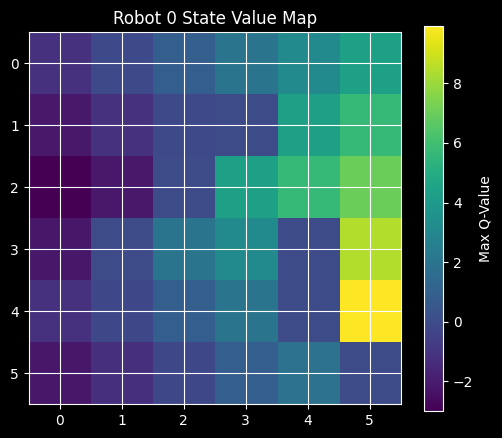


Robot 1 Policy (Start: (0, 5)):
← ← → → ↓ ↓
↓ ↑ ↑ X ↓ ↓
↑ ↓ █ → → ↓
↑ █ ↓ ↑ X ↓
↑ ↑ ↑ ↑ █ ↓
↑ ↑ ↑ ↑ ↑ G


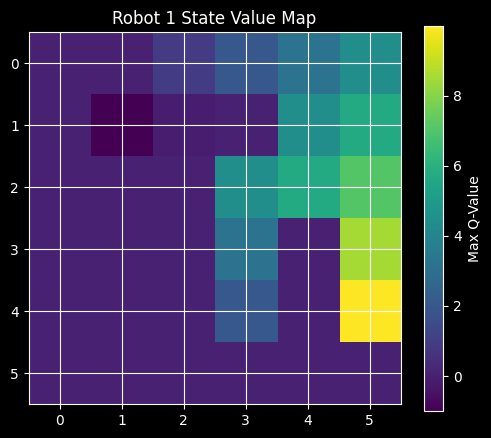

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict
import random

# Environment setup
GRID_SIZE = 6
GOAL = (5, 5)
OBSTACLES = {(2, 2), (3, 1), (4, 4)}
TRAPS = {(1, 3), (3, 4)}
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_MAP = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
REWARD_GOAL = 10
REWARD_TRAP = -10
REWARD_STEP = -1
EPISODES = 100
MAX_STEPS = 50
ALPHA = 0.1
GAMMA = 0.95
EPSILON = 0.1
THETA = 0.01
NUM_ROBOTS = 2
START_POSITIONS = [(0, 0), (0, 5)]  # Different starts for robots

# Shared knowledge
shared_dangerous = set(OBSTACLES)  # Initially only obstacles, traps discovered

# Per robot
Qs = [defaultdict(lambda: {a: 0 for a in ACTIONS}) for _ in range(NUM_ROBOTS)]
models = [{} for _ in range(NUM_ROBOTS)]
priority_queues = [[] for _ in range(NUM_ROBOTS)]

def is_valid(pos, dangerous):
    return 0 <= pos[0] < GRID_SIZE and 0 <= pos[1] < GRID_SIZE and pos not in dangerous

def step(state, action, dangerous):
    dx, dy = ACTION_MAP[action]
    next_state = (state[0] + dx, state[1] + dy)
    if not is_valid(next_state, dangerous):
        next_state = state
    if next_state == GOAL:
        return next_state, REWARD_GOAL
    if next_state in dangerous:
        return next_state, REWARD_TRAP
    return next_state, REWARD_STEP

def select_action(state, Q):
    if np.random.rand() < EPSILON:
        return np.random.choice(ACTIONS)
    return max(Q[state], key=Q[state].get)

def update_priority(state, action, reward, next_state, Q, priority_queue):
    target = reward + GAMMA * max(Q[next_state].values())
    diff = abs(Q[state][action] - target)
    if diff > THETA:
        heapq.heappush(priority_queue, (-diff, state, action))

def update_q(Q, model, priority_queue):
    for _ in range(50):
        if not priority_queue:
            break
        _, s, a = heapq.heappop(priority_queue)
        s_, r = model[(s, a)]
        target = r + GAMMA * max(Q[s_].values())
        Q[s][a] += ALPHA * (target - Q[s][a])
        for a2 in ACTIONS:
            dx, dy = ACTION_MAP[a2]
            prev = (s[0] - dx, s[1] - dy)
            if is_valid(prev, shared_dangerous) and (prev, a2) in model:
                s_prev_, r_prev = model[(prev, a2)]
                update_priority(prev, a2, r_prev, s_prev_, Q, priority_queue)

# Training loop
for ep in range(EPISODES):
    for robot in range(NUM_ROBOTS):
        Q = Qs[robot]
        model = models[robot]
        priority_queue = priority_queues[robot]
        state = START_POSITIONS[robot]
        dangerous = shared_dangerous.copy()  # Local copy including shared
        for _ in range(MAX_STEPS):
            action = select_action(state, Q)
            next_state, reward = step(state, action, dangerous)
            if next_state in TRAPS and next_state not in shared_dangerous:
                shared_dangerous.add(next_state)  # Share discovered trap
                print(f"Robot {robot}, Episode {ep}: Discovered trap at {next_state}")
            model[(state, action)] = (next_state, reward)
            update_priority(state, action, reward, next_state, Q, priority_queue)
            update_q(Q, model, priority_queue)
            if next_state == GOAL:
                break
            state = next_state

# Visualization for each robot
plt.style.use('dark_background')
arrow_map = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→'}
for robot in range(NUM_ROBOTS):
    Q = Qs[robot]
    policy_grid = np.full((GRID_SIZE, GRID_SIZE), ' ')
    value_grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            cell = (i, j)
            if cell == GOAL:
                policy_grid[i, j] = 'G'
            elif cell in shared_dangerous:
                policy_grid[i, j] = '█' if cell in OBSTACLES else 'X'
            else:
                best_a = max(Q[cell], key=Q[cell].get)
                policy_grid[i, j] = arrow_map[best_a]
                value_grid[i, j] = max(Q[cell].values())
    
    print(f"\nRobot {robot} Policy (Start: {START_POSITIONS[robot]}):")
    for row in policy_grid:
        print(' '.join(row))
    
    plt.figure(figsize=(6, 5))
    plt.imshow(value_grid, cmap='viridis')
    plt.colorbar(label="Max Q-Value")
    plt.title(f"Robot {robot} State Value Map")
    plt.xticks(np.arange(GRID_SIZE))
    plt.yticks(np.arange(GRID_SIZE))
    plt.grid(True)
    plt.show()

### Key Changes for TASK-3: Multiple Robots
- **NUM_ROBOTS and START_POSITIONS**: Added constants for 2 robots starting at different positions ((0,0) and (0,5)).
- **Shared Knowledge**: Introduced `shared_dangerous` set, initially containing obstacles; traps are added when discovered by any robot.
- **Per-Robot Structures**: Each robot has its own Q, model, and priority_queue for independent learning.
- **Modified is_valid and step**: Now take a `dangerous` parameter including shared knowledge.
- **Training Loop**: Nested loop over robots; each robot runs an episode, updating its own Q and sharing discovered traps.
- **Trap Discovery**: When a robot hits a trap not in shared_dangerous, add it to shared and print notification.
- **Visualization**: Separate policy and value grids for each robot, showing their learned paths and shared dangerous zones (█ for obstacles, X for discovered traps).
- **Coordination**: Robots learn independently but benefit from shared trap knowledge, reducing redundant exploration; paths may overlap but shared info helps avoid dangers.